In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
heart = pd.read_csv('/heart failur classification dataset.csv',index_col=0)
heart.head(3)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1


In [4]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [5]:
heart = heart.dropna(axis = 0, subset = ['serum_sodium'])

print("Shape after removing null values: ", heart.shape)


Shape after removing null values:  (293, 13)


In [6]:
pip install -U scikit-learn

     |████████████████████████████████| 22.2MB 4.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [7]:
heart.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
heart = heart.drop(['time'], axis = 1)

heart.shape

(293, 12)

In [9]:
heart['sex']=heart['sex'].map({'Male':1,'Female':0})

In [10]:
heart['smoking']=heart['smoking'].map({'No':0,'Yes':1})

In [14]:
X = heart.iloc[:, :-1]
y = heart.iloc[:, -1]

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [23]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 0.68
Testing accuracy of the model is 0.76


In [21]:
predictions = svc.predict(x_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[44 13]
 [ 1  1]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [26]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.78


In [27]:
predictions = rfc.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[39  7]
 [ 6  7]]


In [29]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [30]:
nnc.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [31]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

The Training accuracy of the model is 0.53
The Testing accuracy of the model is 0.58


In [32]:
predictions = nnc.predict(x_test)
print(predictions)

[0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]


In [33]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[29  9]
 [16  5]]


In [40]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)
log.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [41]:
print("The Training accuracy of the model is {:.2f}".format(log.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(log.score(x_test, y_test)))

The Training accuracy of the model is 0.74
The Testing accuracy of the model is 0.76


In [85]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=6)

In [86]:
principal_components= pca.fit_transform(heart)
print(principal_components)

[[ 3.66271909e+02  7.28189037e+03  3.55246056e+00  1.83485072e+00
   2.69719435e+00 -2.21131748e-01]
 [-1.00993440e+05 -4.10985763e+02 -1.02733544e+01 -1.51865360e+01
   6.00128345e+00 -4.42543218e-01]
 [-5.29934482e+04 -4.56444524e+02 -2.08312384e+01 -4.65394534e+00
  -1.58357053e+00  7.89849711e-01]
 ...
 [ 4.79006965e+05  1.37643657e+03  4.51531265e+00  2.14551720e+01
   1.56661284e+00 -2.87804457e-01]
 [-1.22992944e+05  1.86082555e+03 -9.07705410e+00  1.19157884e+01
  -2.67141128e+00  2.90103966e-01]
 [ 1.32006566e+05 -4.11832095e+02 -3.71934965e+00  1.11872705e+01
   1.46112804e+00  2.97921748e-01]]


In [87]:
sum(pca.explained_variance_ratio_)

0.9999999998620583

In [116]:
principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1", "principle component 2", "principle component 3", "principle component 4", "principle component 5", "principle component 6"])
#principal_df.head()
main_df=pd.concat([principal_df,heart["DEATH_EVENT"]], axis=1)
main_df = main_df.iloc[1:]
print(main_df)


     principle component 1  ...  DEATH_EVENT
1           -100993.439555  ...          1.0
2            -52993.448237  ...          1.0
3             64006.559536  ...          1.0
4            -58993.462128  ...          1.0
5           -135993.416980  ...          1.0
..                     ...  ...          ...
293                    NaN  ...          0.0
294                    NaN  ...          0.0
296                    NaN  ...          0.0
297                    NaN  ...          0.0
298                    NaN  ...          0.0

[297 rows x 7 columns]


In [117]:
main_df = main_df.dropna()

In [118]:
X = main_df.iloc[:, :-1]
y = main_df.iloc[:, -1]

In [119]:
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [120]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [121]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 0.67
Testing accuracy of the model is 0.72


In [122]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [123]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.67


In [124]:
nnc.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [125]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

The Training accuracy of the model is 0.48
The Testing accuracy of the model is 0.55


<BarContainer object of 1 artists>

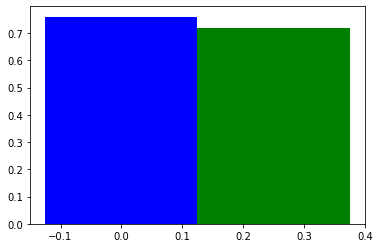

In [132]:
data = [[0.76],[0.72]]
X = np.arange(1)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)

<BarContainer object of 1 artists>

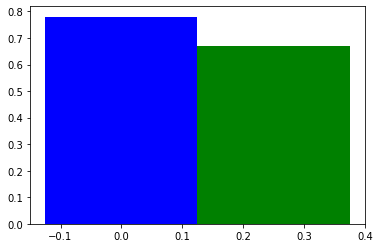

In [133]:
data = [[0.78],[0.67]]
X = np.arange(1)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)

<BarContainer object of 1 artists>

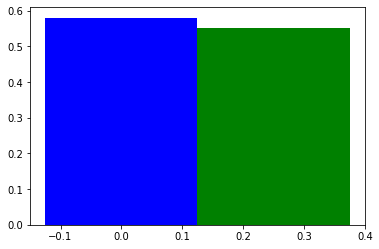

In [134]:
data = [[0.58],[0.55]]
X = np.arange(1)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)